<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.



#### Project Title: Indian Start-up Funding Analysis(2018-2021): A Guide for Entreprenuers Interested in Venturing into The Indian Start-up Ecosystem

#### Project Description: This analysis is to give insight to entreprenuers who are seeking to venture into the Indian start-up ecosystem by highlighting key metrics to consider before venturing

#### Hypothesis: 
#### Null Hypothesis: Technology companies receive more funding than the rest of the sectors.
#### Alternate Hypothesis: Technology companies do not receive more funding than the rest of the sectors.
####
#### Assumptions:
1. In the 2018 data, if the amount does not begin with any currency symbol, it will be considered as dollars.
2. If the year the company was founded is the same as the year it was funded, we will replace null values in the Stage column with 'Seed' value.
3. Rows with duplicate company names will be treated as multiple fundings.

#### Questions

1. How many Tech and Non Tech companies were funded?
2. What was the trend for funding over the years. How many companies were funded each year?
3. What were the Top Ten Cities with Most Startups?
4. Did Companies receive multiple fundings through out the time period?
5. Which sectors had most startups?
6. Which Top 10 Investors funded more (different companies)startups?
7. What was the highest average funding yearly?
8. What is the sum of investments yealy?
9. What is the sum of fundings by sector class(Tech, Non Tech, - Unkown)?
10. Among the highly funded companies which of them were Tech companies?
11. Which top 10 Funding Stages received most fundings? How much of it was used to fund a Tech companies?
13. Which top 10 Cities received most fundings? How much of it was used to fund Tech companies?


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

#### Jupter Notebook in the Anaconda setup was used for this project.


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data manipulation and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# load the datasets with pandas
df_2018 = pd.read_csv('..\datasets\startup_funding2018.csv')
df_2019 = pd.read_csv('..\datasets\startup_funding2019.csv')
df_2020 = pd.read_csv('..\datasets\startup_funding2020.csv')
df_2021 = pd.read_csv('..\datasets\startup_funding2021.csv')

print('Dataset loaded')

Dataset loaded


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

#### 2018 startup_funding dataset previewing

In [3]:
# Check the datatypes
df_2018.info()

# display  dataframe
df_2018.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### 2019 startup_funding dataset previewing

In [4]:
# check the data types
df_2019.info()

# Display the dataframe
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [5]:
# check null values 
df_2020[df_2020['Amount($)'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
29,Delhivery,2011,Gurgaon,E-commerce,Delhivery is a supply chain services company t...,"Kapil Bharati, Mohit Tandon, Sahil Barua, Sura...","Steadview Capital, Canada Pension Plan Investm...",NaN,NaN,NaN
44,PointOne Capital,2020,Bangalore,Venture capitalist,Pre-seed/Seed focussed VC investor,Mihir Jha,NaN,NaN,NaN,NaN
235,Tring,2019,Mumbai,Social Media,"Tring is a celebrity engagement platform, for ...","Akshay Saini, Rahul Saini, Pranav Chabhadia","Sujeet Kumar, Hemesh Singh",NaN,NaN,NaN


#### 2020 startup_funding dataset previewing

In [6]:
# check datatypes
df_2020.info()
# get the head of the data
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


### 2021 startup_funding dataset previewing

In [7]:
# check teh datatypes
df_2021.info()

# display data
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Observations made from the data

2018 Observations
- The columns in 2018 are different from 2019-2021 dataset
- The amount column has a mixture of Indian rupees and US dollar symbol
- The industry and location columns have multiple information

2019 Observations
- The founded column has  float data type
- The amount column has object data type. It has a dollar sign and commas

2020 Observations
- The amount column has object data type. It has a dollar sign and commas
- There's a column 'Unnamed: 9'

2021 Observations
- The amount column has object data type. It has a dollar sign and commas.
- The founded column has  float data type


The columns in the data are:

- Company Name - The name of the company.
- Founded - The year the company was founded.
- Sector - The sector the company operates in.
- Stage - The funding stage of the company.
- Location - The location of the company's headquarters.
- Amount - The amount of funding the company received.
- Description - The 'The About of company'.
- Investor - The investor who funded the company.
- Founder - The founders of the company.

# Cleaning Datasets

 #### Cleaning 2018

In [8]:
# Display dataframe 
df_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [9]:
# check for duplicates in rows
df_2018.duplicated().sum()

1

>- There is 1 duplicate in the 2018 dataset

In [10]:
# drop duplicates
df_2018.drop_duplicates(inplace=True)

In [11]:
# comfirm duplicates have been dropped
print(df_2018.duplicated().sum())

0


>- The duplictes in the 2018 dataset has been dropped

In [12]:
# split location and Industry into list and get first item
df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0]
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [13]:
# confirm splitting of columns: Location and Industry
df_2018[['Industry', 'Location']].head(10)

,Industry,Location
0,Brand Marketing,Bangalore
1,Agriculture,Mumbai
2,Credit,Gurgaon
3,Financial Services,Noida
4,E-Commerce Platforms,Hyderabad
5,Cloud Infrastructure,Bengaluru
6,Internet,Kalkaji
7,Market Research,Hyderabad
8,Information Services,Mumbai
9,Mobile Payments,Bangalore


In [14]:
# Let' clean the Amount column
# replace commas and extract numbers to create a new column
df_2018['Amount($)'] = df_2018['Amount'].str.replace(',', '').str.extract(r'(\d+)').astype(float)      

In [15]:
# Let's assume the amount with no amount sign is already in dollars 
# loop through both Amount and Amount$ and convert Rupees into Dollars
for i in range(len(df_2018['Amount'])):
    df_2018.reset_index(drop=True, inplace=True)
    if df_2018.loc[i, 'Amount'][0] == '₹':
        df_2018.loc[i, 'Amount($)'] = df_2018.loc[i, 'Amount($)'] * 0.0146

In [16]:
# create a copy of the 2018 datframe
df_2018_copy = df_2018.copy()
df_2018_copy.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Amount($)
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,584000.0
2,MyLoanCare,Credit,Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,949000.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN


In [17]:
# drop Amount column
df_2018_copy.drop(columns=['Amount'], inplace=True)
# Create Year of Funding column
df_2018_copy['Year of Funding'] = '2018'
#Create Funding Status column
df_2018_copy['Funding Status'] = 'Disclosed'

In [18]:
# Check the shape of the dataframe
print(df_2018_copy.shape)
df_2018_copy.head()

(525, 8)


,Company Name,Industry,Round/Series,Location,About Company,Amount($),Year of Funding,Funding Status
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,Disclosed
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,Disclosed
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,Disclosed
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,Disclosed
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,Disclosed


In [19]:
# check the null values in each column of the dateframe
df_2018_copy.isnull().sum()

Company Name         0
Industry             0
Round/Series         0
Location             0
About Company        0
Amount($)          148
Year of Funding      0
Funding Status       0
dtype: int64

In [20]:
# # fill null values with the mode in the Amount($) column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_18 = imputer.fit(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'] = imputer_18.transform(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4    1000000.0
Name: Amount($), dtype: float64

In [21]:
# comfirm null value have been replaced
df_2018_copy['Amount($)'].isnull().sum()

0

In [22]:
# check for duplicates in the Company Name
df_2018_copy.duplicated(['Company Name']).sum()

0

In [23]:
### Suppress scietific notations in budget_adj and revenue_adj
pd.options.display.float_format = '{:.1f}'.format
df_2018_copy.head(10)

,Company Name,Industry,Round/Series,Location,About Company,Amount($),Year of Funding,Funding Status
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,Disclosed
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,Disclosed
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,Disclosed
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,Disclosed
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,1000000.0,2018,Disclosed
5,Hasura,Cloud Infrastructure,Seed,Bengaluru,Hasura is a platform that allows developers to...,1600000.0,2018,Disclosed
6,Tripshelf,Internet,Seed,Kalkaji,Tripshelf is an online market place for holida...,233600.0,2018,Disclosed
7,Hyperdata.IO,Market Research,Angel,Hyderabad,Hyperdata combines advanced machine learning w...,730000.0,2018,Disclosed
8,Freightwalla,Information Services,Seed,Mumbai,Freightwalla is an international forwarder tha...,1000000.0,2018,Disclosed
9,Microchip Payments,Mobile Payments,Seed,Bangalore,Microchip payments is a mobile-based payment a...,1000000.0,2018,Disclosed


#### Cleaning 2019


In [24]:
# display dataframe
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [25]:
# Check for duplicated rows
df_2019.duplicated().sum()

0

In [26]:
# check for duplicates iin the Company/Brand column
df_2019.duplicated('Company/Brand').sum()

2

In [27]:
# display duplicate name in Company/Brand column
brand_duplicates_2019 = df_2019[df_2019.duplicated('Company/Brand')]['Company/Brand'].tolist()
brand_duplicates_2019

['Licious', 'Kratikal']

>- There are duplicates brands in the 2019 datasets, could this mean multiple fundings?

In [28]:
# display rows with duplicated company names
dup_19 = df_2019[df_2019['Company/Brand'].isin(brand_duplicates_2019)].sort_values(by='Company/Brand')
dup_19

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A
30,Licious,NaN,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,"$30,000,000",Series E
68,Licious,2015.0,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,"$25,000,000",Series D


In [29]:
# replace year with 2015
df_2019.loc[30, 'Founded']=2015
df_2019.loc[82, 'Founded']=2013

In [30]:
# comfirm dropped duplicates in Company/Nmae
df_2019.duplicated('Company/Brand').sum()

2

In [31]:
# filter dataframe with 'undisclosed' in the Amount$ column 
undisclosed = df_2019[df_2019['Amount($)'].str.match('U.+')]
undisclosed

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,NaN
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,NaN
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,NaN
45,Afinoz,NaN,Noida,Fintech,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,Undisclosed,NaN
54,Ninjacart,2015.0,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,NaN
55,Binca Games,2014.0,Mumbai,Games,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,NaN


In [32]:
# check the founding years for the companies
df_2019['Founded'].value_counts()

2015.0    13
2014.0     8
2016.0     7
2013.0     7
2018.0     6
2017.0     5
2010.0     4
2019.0     4
2011.0     3
2012.0     3
2008.0     1
2004.0     1
Name: Founded, dtype: int64

>- In the 2019 funding dataset, more companies that received funding were founded in 2015.

In [33]:
# Changing the data type of Founded column to a string
def clean_create_cols(data, fund_year):
    data['Amount($)'] = data["Amount($)"].replace({r"(\$$)": np.nan}, regex=True)
    # create a funding status column
    data['Funding Status'] = data["Amount($)"].replace({r"(^[$\d].+)": "Disclosed"}, regex=True)
    # Replace all undisclosed in the Amount column with np.nan and change its datatype to a float
    data["Amount($)"] = data["Amount($)"].replace({r"(\$U.+|\$u.+|U.+)": np.nan, "nan": np.nan}, regex=True)
    data["Amount($)"] = data["Amount($)"].replace({r"(\D)": ""}, regex=True).astype(float)
    # Adding a column to represent the year of funding
    data["Year of Funding"] = fund_year

In [34]:
# run fucntion to clean dataframe
clean_create_cols(df_2019, '2019')

In [35]:
# check the head of the data frame
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,Disclosed,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,Disclosed,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,Disclosed,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,Disclosed,2019


In [36]:
# create a copy of the 2019 datframe
df_2019_copy = df_2019.copy()
df_2019_copy.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,Disclosed,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,Disclosed,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,Disclosed,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,Disclosed,2019


In [37]:
# confirm the unique values in the funding status column
df_2019_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed'], dtype=object)

>- The 2019 datasets had undiscloaed funds

In [38]:
# check and confirm changed datatypes
df_2019_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          62 non-null     float64
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount($)        77 non-null     float64
 8   Stage            43 non-null     object 
 9   Funding Status   89 non-null     object 
 10  Year of Funding  89 non-null     object 
dtypes: float64(2), object(9)
memory usage: 7.8+ KB


In [39]:
# check duplicated Company names
df_2019_copy.duplicated('Company/Brand').sum()

2

>- There are two duplicate brands in  the 2019 dataset

In [40]:
# Filter out company which founded in 2019(same year it received funding)
founded_2019 = df_2019_copy[df_2019_copy['Founded']== 2019]
founded_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
13,JobSquare,2019.0,Ahmedabad,HR tech,Technology-based platform that is connecting s...,Ishit Jethwa,Titan Capital,140500.0,NaN,Disclosed,2019
25,Seekify,2019.0,Delhi,SaaS,Customer Experience (CX) Automation platform,"Arihant Jain, Ajeet Kushwaha",Sequoia Capita,1500000.0,Seed funding,Disclosed,2019
29,Bijak,2019.0,NaN,AgriTech,B2B platform for agricultural commodities.,"Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...","Omnivore and Omidyar Network India, Sequoia Ca...",2500000.0,Seed fund,Disclosed,2019
78,IndyFint,2019.0,Bangalore,Virtual Banking,It helps lenders to directly provide short-ter...,Paddy Padmanabhan,Saravanan Adiseshan,2100000.0,Series A,Disclosed,2019


In [41]:
# get index with empty stage
stage_null_2019 = founded_2019[founded_2019['Stage'].isnull()].index.tolist()
stage_null_2019

[13]

>- There are 13 null values within the stage column of the 2019 dataset

In [42]:
# fill stage null value with seed
df_2019_copy.at[stage_null_2019, 'Stage'] = 'Seed'

In [43]:
# confirm change of null values 
df_2019_copy[df_2019_copy['Stage'].isnull()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,Disclosed,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN,Undisclosed,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,Undisclosed,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,NaN,Undisclosed,2019
11,Appnomic,NaN,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000.0,NaN,Disclosed,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,NaN,Undisclosed,2019
15,LivFin,2017.0,Delhi,Fintech,"Grants small business loans, supply chain fina...",Rakesh Malhotra,German development finance institution DEG,5000000.0,NaN,Disclosed,2019
16,Byju's,2011.0,NaN,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN,Disclosed,2019
18,Witblox,2014.0,NaN,Edtech,Offers a range of robotics learning tools,Amit Modi,Mumbai Angels Network,182700.0,NaN,Disclosed,2019


In [44]:
# filter out and check rows with undisclosed amount
undisclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Undisclosed']
undisclosed_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN,Undisclosed,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,Undisclosed,2019


In [45]:
# filter out and check rows with disclosed amount
disclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Disclosed']
print(disclosed_2019['Amount($)'].isnull().sum())
disclosed_2019.head(2)

0


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,Disclosed,2019


In [46]:
# impute the null values in theh Amount column of the disclosed dataframe with the mode
imputer_19 = imputer.fit(disclosed_2019[['Amount($)']])
disclosed_2019.loc[:, 'Amount($)'] = imputer_19.transform(disclosed_2019[['Amount($)']])
disclosed_2019['Amount($)'].isnull().sum()

0

In [47]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes
df_copy_2019 = pd.concat([disclosed_2019, undisclosed_2019], ignore_index = True)
df_copy_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,Disclosed,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,Disclosed,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,Disclosed,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,Disclosed,2019


#### Cleaning 2020

In [48]:
# display the dataframe 
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [49]:
# Dropping 'Unnamed:9' column in the dataFrame
df_2020.drop(columns='Unnamed: 9', inplace=True)

In [50]:
# check for duplicates in Company/Brand column
duplicates_2020 = df_2020[df_2020.duplicated('Company/Brand')].sort_values(by='Company/Brand')
duplicates_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
852,Airmeet,NaN,Bangalore,Media & Networking,"A platform to host, discover, and attend fully...","Lalit Mangal, Vinay Jaasti, Manoj Singh",Accel India,"$3,000,000",NaN
884,AjnaLens,2014,Thane,Deeptech,"It leverages technologies such as AR, VR & AI ...","Pankaj Raut, Abhishek Tomar, Abhijit Patil","Maharashtra Defence, Aerospace Venture Fund (M...","$1,500,000",Pre series A
862,Arya,NaN,Noida,Agritech,Provides post-harvest services across the agri...,Prasanna Rao,LGT Lightstone Aspada,"$6,000,000",Series B
222,Arzooo,2016,Bangalore,Retail Tech,"Retail tech platform empowering 300,000+ small...","Khushnud Khan, Rishi Raj Rathore","3Lines, Jabbar Internet Group","$7,500,000",Series A
559,Ather Energy,2013,Bangalore,Automobile,Electric scooter manufacturer,"Tarun Mehta, Swapnil Jain",Hero MotoCorp,"$11,241,000",Series C
...,...,...,...,...,...,...,...,...,...
367,Zomato,2008,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford","$100,000,000",NaN
348,Zomato,2008,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford","$62,000,000",NaN
1034,Zomato,NaN,NaN,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,"$150,000,000",NaN
247,Zomato,2008,Gurugram,FoodTech,Zomato is a food delivery and restaurant disco...,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management","$52,000,000",NaN


In [51]:
# create a list for duplicated company names
brands_dup_2020 = duplicates_2020['Company/Brand'].to_list()
# filter out duplicated column names
dup_2020 = df_2020[df_2020['Company/Brand'].isin(brands_dup_2020)].sort_values(by='Company/Brand')
dup_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
419,Airmeet,2019,Bangalore,Tech Startup,Airmeet is an all-in-one events platform for v...,"Lalit Mangal, Manoj Singh, Vinay Kumar Jasti","Global Founders Capital, Redpoint","$12,000,000",Series A
852,Airmeet,NaN,Bangalore,Media & Networking,"A platform to host, discover, and attend fully...","Lalit Mangal, Vinay Jaasti, Manoj Singh",Accel India,"$3,000,000",NaN
884,AjnaLens,2014,Thane,Deeptech,"It leverages technologies such as AR, VR & AI ...","Pankaj Raut, Abhishek Tomar, Abhijit Patil","Maharashtra Defence, Aerospace Venture Fund (M...","$1,500,000",Pre series A
177,AjnaLens,2014,Thane,AR/VR startup,AjnaLens develops AR/VR wearables primarily fo...,"Abhijit Patil, Abhishek Tomar, Pankaj Raut","Mohsin Hani Al Bahrani, MoD","$1,000,000",Bridge
862,Arya,NaN,Noida,Agritech,Provides post-harvest services across the agri...,Prasanna Rao,LGT Lightstone Aspada,"$6,000,000",Series B
...,...,...,...,...,...,...,...,...,...
1034,Zomato,NaN,NaN,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,"$150,000,000",NaN
801,Zomato,NaN,Gurugram,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Pacific Horizon,"$5,000,000",NaN
15,Zomato,2008,Gurgaon,Food Delivery,Zomato is a food delivery and restaurant disco...,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management","$660,000,000",NaN
392,mCaffeine,2015,Mumbai,Personal care startup,MCaffeine is a personal care brand that offers...,"Tarun Sharma, Vikas Lachhwani","RPSG Ventures, Amicus Capital","$2,900,000",Series B


In [52]:
#Repacing string  value in company
df_2020.loc[df_2020['Company/Brand']=='True Balance', ['Amount($)', 'Stage']] = [28000000, 'Series C']
df_2020.loc[df_2020["Company/Brand"] == "Eruditus", ["Amount($)", "Stage"]] = [825000000, "Series D"]

In [53]:
# drop duplicated rows
df_2020.drop_duplicates(inplace= True)

In [54]:
# run function to clean data
clean_create_cols(df_2020, '2020')

In [55]:
# display head of the dataframe
df_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,Disclosed,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,Disclosed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,Undisclosed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,Disclosed,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,Disclosed,2020


In [56]:
# create a copy of the 2020 dataframe
df_2020_copy = df_2020.copy()

In [57]:
# confirm change of datatype
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1052 non-null   object 
 1   Founded          840 non-null    object 
 2   HeadQuarter      958 non-null    object 
 3   Sector           1039 non-null   object 
 4   What it does     1052 non-null   object 
 5   Founders         1040 non-null   object 
 6   Investor         1014 non-null   object 
 7   Amount($)        805 non-null    float64
 8   Stage            592 non-null    object 
 9   Funding Status   1049 non-null   object 
 10  Year of Funding  1052 non-null   object 
dtypes: float64(1), object(10)
memory usage: 98.6+ KB


In [58]:
# filter out companies with Founding Year 2020
founded_2020 = df_2020_copy[df_2020_copy['Founded'] == '2020']
#founded_2020.drop_duplicates(subset='Company', keep='First')['Stage'].value_counts()

In [59]:
# display filtered dataframe
founded_2020.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,Disclosed,2020
16,OurEye.ai,2020,Bangalore,Virtual auditing startup,Video intelligence solution for Enterprise Sta...,"Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal","100X VC, Amara Ventures",120000.0,NaN,Disclosed,2020
28,Voosh,2020,Bangalore,Food Industry,Building India's largest digital food service ...,Priyam Saraswat,Better Capital,NaN,Pre-seed,Undisclosed,2020
44,PointOne Capital,2020,Bangalore,Venture capitalist,Pre-seed/Seed focussed VC investor,Mihir Jha,NaN,NaN,NaN,NaN,2020
47,Tinker Coders,2020,Noida,EdTech,Tinker Coder is a LIVE Online Platform through...,Anoop Gautam,STEMROBO Technologies,NaN,Seed,Undisclosed,2020


In [60]:
# get index with empty stage
stage_null_2020 = founded_2020[founded_2020['Stage'].isnull()].index.tolist()
stage_null_2020

[3, 16, 44, 57, 86, 91, 95, 121, 182, 188, 193, 329, 558, 838]

>- Below is the indexes for null values in the Stage column 

In [61]:
# replace null values with 'Seed Stage'
df_2020_copy.at[stage_null_2020, 'Stage'] = 'Seed'

In [62]:
# filter out and check rows with undisclosed amount
undisclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Undisclosed']
undisclosed_2020.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,Undisclosed,2020
7,Metvy,2018,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series,Undisclosed,2020


In [63]:
# filter out dataframe with disclosed amount
disclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Disclosed']
print(disclosed_2020['Amount($)'].isnull().sum())
disclosed_2020.head(2)

0


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,Disclosed,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,Disclosed,2020


In [64]:
# impute the null values in theh Amount column of the disclosed dataframe with the mode
imputer_20 = imputer.fit(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'] = imputer_20.transform(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'].isnull().sum()

0

In [65]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes
df_copy_2020 = pd.concat([disclosed_2020, undisclosed_2020], ignore_index = True)
df_copy_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,Disclosed,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,Disclosed,2020
2,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Seed,Disclosed,2020
3,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,Disclosed,2020
4,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,Disclosed,2020


#### Cleaning 2021

In [66]:
# display data
df_2021.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",NaN
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",NaN
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,NaN
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",NaN,"$1,000,000",NaN


In [67]:
# ckeck for duplicate rows 
df_2021.duplicated().sum()

19

>- There 19 duplicates in the 2021 datasets

In [68]:
# drop duplicate rows
df_2021.drop_duplicates(inplace=True)

In [69]:
# confirm droppe rows
df_2021.duplicated().sum()

0

In [70]:
# These rows has  misplaced values under the columns
df_2021.loc[[86, 98, 242, 257, 538, 545, 551, 674, 677, 1100, 1137, 1146, 1148]]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",NaN,NaN
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [71]:
# Correcting misplaced value
df_2021.loc[df_2021["Company/Brand"] == "FanPlay", ["Founders", "Investor", "Amount($)", "Stage"]] = ["Pritesh Kumar, Bharat Gupta", "Upsparks", '$1200000', "Pre-series A"]
df_2021.loc[df_2021["Company/Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector", "What it does","Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "Pharmaceuticals", "Primary Business is Development and Manufactur..."," Varun Khanna", "Morgan Stanley Private Equity Asia", '$22000000', "Series C"]
df_2021.loc[df_2021["Company/Brand"] == "MoEVing", ["Sector", "What it does", "Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "MoEVing is India's only Electric Mobility focu...", "Vikash Mishra, Mragank Jain", "Anshuman Maheshwary, Dr Srihari Raju Kalidindi", '$5000000', "Seed"]
df_2021.loc[df_2021["Company/Brand"] == "Little Leap", ["Founders", "Investor", "Amount($)", "Stage"]] = ['Vishal Gupta',"ah! Ventures", '$300000', ""]
df_2021.loc[df_2021["Company/Brand"] == "AdmitKard", [ "Investor", "Amount($)", "Stage"]] = ["", '$1000000', "Pre-series A"]
df_2021.loc[df_2021['Company/Brand'] == 'BHyve', ["Amount($)", "Stage", "Founders", "Investor"]] = ['$300000', '', 'Omkar Pandharkame, Ketaki Ogale','ITO Angel Network, LetsVenture']
df_2021.loc[df_2021["Stage"] == "$6000000", ["Founders", "Investor", "Amount($)", "Stage"]] = ["", "Aryaman Vir", '$6000000', "Seed"]
df_2021.loc[df_2021["Amount($)"] == 'JITO Angel Network, LetsVenture', ["Founders", "Investor", "Amount($)", "Stage"]] = ['Sushil Agarwal', 'JITO Angel Network, LetsVenture', '$1000000', '']
df_2021.loc[df_2021['Company/Brand'] == "Sochcast", ["HeadQuarter", "Sector", "What it does", "Founders", \
                                                    "Investor", "Amount($)", "Stage"]] = ["", "Online Media", "Sochcast is an Audio experiences company that ...", "CA Harvinderjit Singh Bhatia, Garima Surana", 
                                                    "Vinners, Raj Nayak, Amritaanshu Agrawal", "Undisclosed", ""]
df_2021.loc[df_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = ['$1000000', "Seed", "Anand Aryamane"]
df_2021.loc[df_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = ['$300000', "Angel", "ITO Angel Network LetsVenture"]


In [72]:
# check for duplicated Company names 
duplicate_2021 = df_2021[df_2021.duplicated('Company/Brand')]
duplicate_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
80,Uable,2020.0,Bangalore,EdTech,Uable are on a bold mission to redefine the fu...,Saurabh Saxena,"JAFCO Asia, Chiratae Ventures","$35,000,000",Pre-series A
108,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
110,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",NaN,$1000000,Pre-series A
112,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,Pre-seed
113,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,Pre-series A
...,...,...,...,...,...,...,...,...,...
1193,Sapio Analytics,2019.0,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",$Undisclosed,NaN
1195,Delhivery,2011.0,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,$76000000,Series I
1198,GoKwik,2020.0,New Delhi,Information Technology & Services,GoKwik is a platform for solving shopping expe...,"Ankush Talwar, Chirag Taneja, Vivek Bajpai","Matrix Partners India, Jitendra Gupta, RTP Global",$5000000,Pre-series A
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C


In [73]:
# create a list duplicated company names
brands_dup_2021 = duplicate_2021['Company/Brand'].to_list()
# filter out duplicated company names
df_2021[df_2021['Company/Brand'].isin(brands_dup_2021)].sort_values(by='Company/Brand')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
877,Advantage Club,2014.0,Gurugram,HR Tech,Advantage Club is India's largest employee eng...,Sourabh Deorah,"Y Combinator, Jetty Ventures, Earlsfield Capit...",$3300000,Pre-series A
127,Akudo,2020.0,Bangalore,FinTech,Akudo is pioneering the concept of Learning-Fi...,"Lavika Aggarwal, Sajal Khanna, Jagveer Gandhi","Y Combinator, Incubate Fund India",$Undisclosed,Pre-seed
1090,Akudo,2020.0,Bangalore,Financial Services,A Learning-First Neobank for teenagers - Enabl...,"Lavika Aggarwal, Sajal Khanna, Jgaveer Gandhi","Y Combinator, JAFCO Asia, Incubate Fund India,...",$4200000,Seed
645,Apna,2019.0,Bangalore,Human Resources,India's Professional App - Apna is dedicated t...,Nirmit Parikh,"Sequoia Capital India, rocketship.vc",$70000000,Series B
...,...,...,...,...,...,...,...,...,...
435,Zupee,2018.0,Gurgaon,Gaming,Zupee is a skill-based gaming app that enables...,"Dilsher Singh Malhi, Siddhant Saurabh","Orios Venture Partners, Matrix Partners India","$10,000,000",NaN
38,boAt,2016.0,New Delhi,Electronics,boAt is a consumer electronics and lifestyle c...,"Aman Gupta, Sameer Mehta","Qualcomm Ventures, Warburg Pincus","$6,000,000",NaN
443,boAt,2016.0,Mumbai,Fashion & Lifestyle,boAt is a lifestyle brand that deals in fashio...,"Aman Gupta, Sameer Mehta","InnoVen Capital, InnoVen Capita","$100,000,000",PE
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


In [74]:
# run function to clean data
clean_create_cols(df_2021, '2021')

In [75]:
# display data
df_2021.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,Disclosed,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,Disclosed,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,Disclosed,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,Disclosed,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,Disclosed,2021


In [76]:
# create a copy of the 2021 datrframe
df_2021_copy = df_2021.copy()
df_2021_copy.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,Disclosed,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,Disclosed,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,Disclosed,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,Disclosed,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,Disclosed,2021


In [77]:
# check the unique status in the funding status columns created
df_2021_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed', nan], dtype=object)

>- There are undisclosed fundings in the 2021 datasets

In [78]:
# confirm  change of Amount column datatype
df_2021_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1190 non-null   object 
 1   Founded          1189 non-null   float64
 2   HeadQuarter      1189 non-null   object 
 3   Sector           1190 non-null   object 
 4   What it does     1190 non-null   object 
 5   Founders         1186 non-null   object 
 6   Investor         1129 non-null   object 
 7   Amount($)        1049 non-null   float64
 8   Stage            774 non-null    object 
 9   Funding Status   1187 non-null   object 
 10  Year of Funding  1190 non-null   object 
dtypes: float64(2), object(9)
memory usage: 143.9+ KB


In [79]:
# filter out companies which were founded in 2021
founded_2021 = df_2021_copy[df_2021_copy['Founded']== 2021]
founded_2021['Stage'].value_counts()

Seed            28
Pre-seed         6
Series A         5
Pre-series A     4
Series B         2
Series C         1
Series D         1
Name: Stage, dtype: int64

In [80]:
founded_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,Disclosed,2021
30,Jambox Games,2021.0,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,NaN,1100000.0,Seed,Disclosed,2021
45,moEVing,2021.0,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,NaN,1000000.0,Seed,Disclosed,2021
155,UpScalio,2021.0,Gurugram,E-commerce,"UpScalio is India’s next generation, data-driv...",Gautam Kshatriya,NaN,42000000.0,NaN,Disclosed,2021
216,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,Disclosed,2021


In [81]:
# get index with empty stage
stage_null_2021 = founded_2021[founded_2021['Stage'].isnull()].index.tolist()
stage_null_2021

[155,
 235,
 273,
 284,
 307,
 553,
 599,
 659,
 843,
 868,
 907,
 920,
 922,
 952,
 956,
 988,
 1003,
 1080,
 1106,
 1121,
 1135,
 1182,
 1192]

In [82]:
# replace null values with seed
df_2021_copy.at[stage_null_2021, 'Stage'] = 'Seed'

In [83]:
# filter out and check rows with undisclosed amount
undisclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Undisclosed']
undisclosed_2021.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,NaN,Pre-series A,Undisclosed,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,NaN,NaN,Undisclosed,2021


In [84]:
# filter out and check the rows with disclosed amount
disclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Disclosed']
print(disclosed_2021['Amount($)'].isnull().sum())
disclosed_2021.head(2)

94


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,Disclosed,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,Disclosed,2021


In [85]:
# impute the null values in the Amount column of the disclosed dataframe with the mode
imputer_21 = imputer.fit(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'] = imputer_21.transform(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'].isnull().sum()

0

In [86]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes

df_copy_2021 = pd.concat([disclosed_2021, undisclosed_2021], ignore_index = True)
df_copy_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Status,Year of Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,Disclosed,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,Disclosed,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,Disclosed,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,Disclosed,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,Disclosed,2021


#### Merging all dataframes into one dataframe

In [87]:
# Joining all DataFrames with similar column names
combined_2019_2021 = pd.concat([df_2019_copy, df_2020_copy, df_2021_copy], ignore_index = True)
combined_2019_2021.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", 
                              "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Status", "Funding Year"]
combined_2019_2021.head()

,Company Name,Year Founded,Headquarters,Sector,Description,Founders,Investors,Amount,Funding Stage,Funding Status,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,Disclosed,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,Disclosed,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,Disclosed,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,Disclosed,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,Disclosed,2019


In [88]:
# Renaming the columns in the 2018 dataframe to match with the other dataframes
df_2018_copy.columns = ['Company Name', 'Sector', 'Funding Stage', 'Headquarters', 'Description', 'Amount', 'Funding Year', 'Funding Status']
df_2018_copy.head()

,Company Name,Sector,Funding Stage,Headquarters,Description,Amount,Funding Year,Funding Status
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,Disclosed
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,Disclosed
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,Disclosed
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,Disclosed
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,1000000.0,2018,Disclosed


In [89]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
combined_set = pd.concat([df_2018_copy, combined_2019_2021], ignore_index = True)

combined_set.head()

,Company Name,Sector,Funding Stage,Headquarters,Description,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,Disclosed,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,Disclosed,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,Disclosed,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,Disclosed,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,1000000.0,2018,Disclosed,NaN,NaN,NaN


In [90]:
# Check general info on combine dataset
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    2856 non-null   object 
 1   Sector          2838 non-null   object 
 2   Funding Stage   1972 non-null   object 
 3   Headquarters    2742 non-null   object 
 4   Description     2856 non-null   object 
 5   Amount          2456 non-null   float64
 6   Funding Year    2856 non-null   object 
 7   Funding Status  2850 non-null   object 
 8   Year Founded    2091 non-null   object 
 9   Founders        2312 non-null   object 
 10  Investors       2232 non-null   object 
dtypes: float64(1), object(10)
memory usage: 245.6+ KB


## Cleaning combined set

#### Removing irrelevant data

In [91]:
# dropping columns that wouldn't be used for analysis
combined_set.drop (['Description'],  axis=1, inplace=True)

combined_set.head()

,Company Name,Sector,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,250000.0,2018,Disclosed,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,584000.0,2018,Disclosed,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,949000.0,2018,Disclosed,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,2000000.0,2018,Disclosed,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,1000000.0,2018,Disclosed,NaN,NaN,NaN


#### Cleaning the Funding Stage column

In [92]:
# dictionaries of corection to clen the funding stage
Stage_corrections = {(r'Ang.+'): 'Angel', (r'Brid.+'): 'Bridge', (r'Debt.*'): 'Debt Financing', \
               (r'(Ear.+|Seed.*)'): 'Seed', (r'(S.+ies\sa.*)'): 'Series A',\
              (r'(S.+ies\sb.*)'): 'Series B', (r'(S.+ies\sc.*)'): 'Series C',\
              (r'(S.+ies\sd.*)'): 'Series D', (r'(S.+ies\sf.*)'): 'Series F',\
               (r'(S.+ies\se.*)'): 'Series E', (r'(S.+ies\sg.*)'): 'Series G', (r'(S.+ies\sh.*)'): 'Series H',\
              (r'(Htt.*|Ven.+|^$)'): 'Unknown', (r'(P.+ies\sa.*)'): 'Pre Series A',\
              (r'(P.+ies\sb.*)'): 'Pre Series B', (r'(P.+ies\sc.*)'): 'Pre Series C',\
              (r'(.*(f|F)un.+)'): 'Fresh Funding', (r'(.+seed.*)'): 'Pre Seed', np.nan: 'Unknown', (r'^Pe$'): 'Private equity'}

In [93]:
# Run and effect changes in the dataset
combined_set['Funding Stage'] = combined_set['Funding Stage'].str.capitalize().replace(Stage_corrections, regex=True)


In [94]:
# get the number of unique stages
Stages = combined_set['Funding Stage'].sort_values().unique()
print(len(Stages))
Stages

30


array(['Angel', 'Bridge', 'Corporate round', 'Debt Financing', 'Edge',
       'Fresh Funding', 'Grant', 'Mid series', 'Non-equity assistance',
       'Post-ipo debt', 'Post-ipo equity', 'Pre Seed', 'Pre Series A',
       'Pre Series B', 'Pre Series C', 'Pre-series', 'Private equity',
       'Secondary market', 'Seed', 'Series A', 'Series B', 'Series C',
       'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
       'Series i', 'Undisclosed', 'Unknown'], dtype=object)

#### Cleaning the Sector column

In [95]:
#Finding unique sectors
unique_sectors = (combined_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech               174
EdTech                147
Financial Services     86
Fintech                85
Edtech                 74
E-commerce             73
Automotive             53
AgriTech               43
Food & Beverages       38
Logistics              37
Name: Sector, dtype: int64

In [96]:
# Check for CCompanies in the Arificial Intelligence sector

AI_sector= combined_set[combined_set['Sector'].str.match('AI', na=False)]
AI_sector['Sector'].unique()

array(['AI & Tech', 'AI', 'AI startup', 'AI platform', 'AI Company',
       'AI Startup', 'AI Platform', 'AI health', 'AI & Debt',
       'AI & Data science', 'AI & Media', 'AI & Deep learning',
       'AI Robotics', 'AI Chatbot', 'AI company'], dtype=object)

In [97]:
# check the unique values in the sector
unique_sectors = combined_set['Sector'].sort_values().unique()
unique_sectors

array(['', '3D Printing', 'AI', 'AI & Data science', 'AI & Debt',
       'AI & Deep learning', 'AI & Media', 'AI & Tech', 'AI Chatbot',
       'AI Company', 'AI Platform', 'AI Robotics', 'AI Startup',
       'AI company', 'AI health', 'AI platform', 'AI startup',
       'API platform', 'AR platform', 'AR startup', 'AR/VR',
       'AR/VR startup', 'Accomodation', 'Accounting', 'Ad-tech',
       'Advertisement', 'Advertising', 'Advisory firm', 'Aeorspace',
       'Aero company', 'Aerospace', 'AgTech', 'Agri tech', 'AgriTech',
       'Agriculture', 'Agritech', 'Agritech startup', 'Agritech/Commerce',
       'Air Transportation', 'Alternative Medicine', 'Analytics',
       'Android', 'Apparel & Fashion', 'Appliance', 'Apps',
       'Artificial Intelligence', 'Arts & Crafts', 'Audio',
       'Augmented reality', 'Auto-tech', 'Automation', 'Automation tech',
       'Automobile', 'Automobile & Technology', 'Automobile Technology',
       'Automobiles', 'Automotive', 'Automotive Startup',
    

In [98]:
# Change ector column to uppercase 
combined_set['Sector']= combined_set['Sector'].str.upper()

In [99]:
# Dictionary of corrections for the sector column
sector_corrections = {(r"^$|^CLAS.+|^MANC.+|^GREA.+|^GOVE.+|^HAUZ.+|^\—"):"UNKNOWN", (r"^AI.*|^ARTI.+|^ROBOTICS.*|CONVER.+"):"Artificial Inteligence", \
                    (r"^AR\s.*|^AR/VR.+|AUGM.*"):"AR/VR", (r"^AER0.+|AVIA.+|AEOR.+|SPACE.+|DEFE.+|^AERO\sCOM.+"):"Aerospace",\
                     (r".+SHION.*|CLOTH.+|FOOOT.+|D2C.*|^JEWEL.*"):"Fashion", (r"NFT.*"):"NFT", (r"CONTE.+"):"Content Creation and Management",\
                     (r".*SOFTW.+"):"Software", (r"CONSUM.+|APPLI.*"):"Consumer Goods and Services", \
                      (r"FOOD.*[^T][^E][^C][^H]$|BEVE.+|^FOOD$|.*PRODUCTIO.*|.*NUTR.+[^T][^E][^C][^H]$|^FOO.+TRITIO.+|^FOO.+LO.+"):"Food and Nutrition", \
                     (r"^AUTOMAT.+|^INDUS.+"):"Automation Tech", (r"^AUTO.+"):"Automotive", \
                      (r"HEA.*[^H][^T][^E][^C][^H]$|.*FIT.+|.*WELLN.+|YOGA.+|DENTA.+|.+THCARE|.+DIAGN.*|^HEALTH$|.*HEALTH\sCARE") : "Healthcare and Wellness", \
                     (r".*DATA.+|BIG.+|^LOCAT.+"): "Analytics", (r"CLOUD.+"): "Cloud Company",(r".*EDUCATION.*"):"Education", (r"^EV\s*.*"):"Ev",\
                     (r"ACCOU.+|CROW.+|.*FINAC.+|.*FINANC.*|.*FUND.+|.*BANK.+|[^HTE].+MANA.+|CRED.+|.*CAPI.+|.*INVES.+|.*INSU.+[^T][^E][^C][^H]$") : "Financial Services",\
                     (r".*GAME.*|GAMI.+"):"Gaming", (r".*APP.*"):"Apps", (r".*APP.*"):"Apps", (r".*INTERN.*|^IOT.+"):"IOT", (r"^IT.+|INFORM.+|.*COMPUTER.+SECUR.+|COMPUTER|^CYBER.+"):"IT",\
                     (r"HOME.+"):"Home Product and Servies", (r"^AG.*TECH.*|^AGRITECH"): "Agriculture Technology", (r"BUSIN.*"): "Business Deleopment and Inteligence", \
                     (r"TELECOM.+"):"Telecommunications", (r"VIDEO.*"):"Video Streaming and Sharig", (r".*REAL.*|HOUS.+|WAREH.+"):"Housing and Real Estate",\
                     (r"^BIOTECH.*"):"BIOTECHNOLOGY", (r"^BEAUTY.*|^COSMETIC.*"):"BEAUTY AND COSMETICS", (r"^E-LEARN.*|^EDTECH.*|^EDTT.+"):"EDTECH",\
                      (r".*E.*COMMER.*|.*ECOMMER.*"):"E-COMMERCE", (r"^B2B.*"):"B2B", (r"^ADVERT.+"):"Advertising",(r"^BATTERY.*"):"Battery",\
                     (r"^CHILDREN.*"):"Child Care", (r"^BLOCKCHAIN.*"):"BLOCKCHAIN",(r"^CO-WORK.+|^COLLABO.+|^COWORK.+"):"Co-working and Collaboration", (r"^COMMUNI.*"):"COMMUNITY", \
                     (r"^BIKE.*"):"bike Service and Rentals", (r"^CAR\s.*"):"Car services", (r"^CONSULT.*"):"CONSULTING", (r"^CUSTOMER.+"):"CUSTOMER SERVICE",\
                    (r"^CRYPTO.*"):"Cryptocurrency", (r"^TRANSPORT.*|^LAST MI.*"):"TRANSPORTATION", (r"^DEEP.+"):"Deeptech", (r"^TECH.*"):"Technology", (r"^SOLAR.*|^OIL.*"):"Energy",\
                     (r"^CREATIVE AGAENCY.*"):"Arts and crafts", (r".*DELIVERY.*"):"Delivery Services", (r".*ENTERTAINMENT.*"):"ENTERTAINMENT",\
                     (r"^E-MARK.+"):"E-marketing", (r"^LOGISTICS.*|^SUPPLY.+"):"Logistics and Supply Chain", (r"^EYE.+"):"Eye wear", (r"^SPORTS\s*.*"):"SPORTS", \
                     (r"^TOBACCO|^CANNABIS"):"Plants", (r"^TOURISM.*"):"Tourism", (r"^SAAS.*"):"SAAS", (r".+THTECH"):"Healthtech", (r".*INSU.+TECH|^MOBILE PAY.+"):"Fintech", \
                      (r"^FOO.+TECH.*|^NUTRITION TECH"):"Foodtech", np.nan: "Unknown", (r"^SOCIAL\sN.+"):"Healthtech",(r"^RETAIL.*"):"Retail", (r"^RENTAL.*"):"Rental"}


In [100]:
# replace corrections with Sectors
combined_set['New Sector'] = combined_set['Sector'].replace(sector_corrections, regex=True).str.title()
combined_set['New Sector'] = combined_set['New Sector'].replace({(r"^It$"):"IT"}, regex=True)

In [101]:
# pd.set_option('display.max_rows', None)
# maunally comparing changes 'New Sector' to 'Sector'
combined_set[['New Sector', 'Sector']].sort_values(by='New Sector')

,New Sector,Sector
139,3D Printing,3D PRINTING
586,Accomodation,ACCOMODATION
1560,Accomodation,ACCOMODATION
604,Accomodation,ACCOMODATION
1486,Accomodation,ACCOMODATION
...,...,...
1865,Wholesale,WHOLESALE
2802,Wine & Spirits,WINE & SPIRITS
1781,Wine & Spirits,WINE & SPIRITS
1046,Wl & Rac Protection,WL & RAC PROTECTION


In [102]:
print(len(combined_set['Sector'].sort_values().unique().tolist()))


555


In [103]:
# Create a new column and give it the string 'Tech' if it matches the regex 
tech_filt = combined_set['New Sector'].str.match(r".*[Tt]ech.*|^Arti.*|^Auto.*|^Saas|^Video.*,\
                        |^It$|^Apps$|^Aero.*|^Analy.*|^Soft.*|^Gami.*|^Ar/vr|^Audio|^Block.+|^Cloud.+|^Compan|^Dron.+,\
                        |^E-com|.+vehi.+|^Electro.+|^Ev$|^File.+s.+|^Fraud.+|^Iot$|^Andr.+|^Api.+\
                        |^Search\sen.+|^Social\smedia$|^Mobil.*|^Teleco.+", na=False)
tech = combined_set[tech_filt]
tech_index = tech.index.tolist()
combined_set.at[tech_index, 'Tech or Non-Tech'] = 'Tech'

In [104]:
# Fill the Tech or Non tech column with unknown if the sector is unknown
unknown_filt = (combined_set['New Sector'] == 'Unknown')
unknown = combined_set[unknown_filt]
unknown_index = unknown.index.tolist()
combined_set.at[unknown_index, 'Tech or Non-Tech'] = 'Unknown'

In [105]:
# Fill the Tech or Non tech column with Non Tech if the sector not unknown but not Tech
non_tech = combined_set[~(tech_filt | unknown_filt)]
non_tech_index = non_tech.index.tolist()
combined_set.at[non_tech_index, 'Tech or Non-Tech'] = 'Non Tech'

In [106]:
# manually very the changes and values in the new column
pd.set_option('display.max_rows', None)
combined_set[['New Sector', 'Tech or Non-Tech']].sort_values(by='New Sector').head()

,New Sector,Tech or Non-Tech
139,3D Printing,Non Tech
586,Accomodation,Non Tech
1560,Accomodation,Non Tech
604,Accomodation,Non Tech
1486,Accomodation,Non Tech


In [107]:
# Drop the Sector column since we have created a new column
combined_set = combined_set.drop(columns='Sector')
# combined_set['New Sector'] = combined_set['New Sector'].str.upper()

In [108]:
# display the dataset to confirm all the changes and cleaning so far
combined_set

,Company Name,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors,New Sector,Tech or Non-Tech
0,TheCollegeFever,Seed,Bangalore,250000.0,2018,Disclosed,NaN,NaN,NaN,Brand Marketing,Non Tech
1,Happy Cow Dairy,Seed,Mumbai,584000.0,2018,Disclosed,NaN,NaN,NaN,Agriculture,Non Tech
2,MyLoanCare,Series A,Gurgaon,949000.0,2018,Disclosed,NaN,NaN,NaN,Financial Services,Non Tech
3,PayMe India,Angel,Noida,2000000.0,2018,Disclosed,NaN,NaN,NaN,Financial Services,Non Tech
4,Eunimart,Seed,Hyderabad,1000000.0,2018,Disclosed,NaN,NaN,NaN,E-Commerce,Non Tech
5,Hasura,Seed,Bengaluru,1600000.0,2018,Disclosed,NaN,NaN,NaN,Cloud Company,Tech
6,Tripshelf,Seed,Kalkaji,233600.0,2018,Disclosed,NaN,NaN,NaN,Iot,Tech
7,Hyperdata.IO,Angel,Hyderabad,730000.0,2018,Disclosed,NaN,NaN,NaN,Market Research,Non Tech
8,Freightwalla,Seed,Mumbai,1000000.0,2018,Disclosed,NaN,NaN,NaN,IT,Non Tech
9,Microchip Payments,Seed,Bangalore,1000000.0,2018,Disclosed,NaN,NaN,NaN,Fintech,Tech


# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [109]:
# change the datatype and clean the Year 'Founded' and 'Funding Year'
combined_set['Year Founded'] = combined_set['Year Founded'].replace('-', np.nan)
combined_set['Year Founded'] = combined_set['Year Founded'].astype(float).astype('Int64')
combined_set['Funding Year'] = combined_set['Funding Year'].astype(int)

In [110]:
# Create new features/columns 'Company Age'  and 'Age at Funding'
combined_set['Company Age'] = 2022 - combined_set['Year Founded']
combined_set['Age at Funding'] = combined_set['Funding Year'] - combined_set['Year Founded']

In [111]:
# check the dattypes
combined_set.dtypes

Company Name         object
Funding Stage        object
Headquarters         object
Amount              float64
Funding Year          int32
Funding Status       object
Year Founded          Int64
Founders             object
Investors            object
New Sector           object
Tech or Non-Tech     object
Company Age           Int64
Age at Funding        Int64
dtype: object

In [112]:

# display the first 9 roes of the comn=bined dataframe
combined_set.head(9)

,Company Name,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors,New Sector,Tech or Non-Tech,Company Age,Age at Funding
0,TheCollegeFever,Seed,Bangalore,250000.0,2018,Disclosed,<NA>,NaN,NaN,Brand Marketing,Non Tech,<NA>,<NA>
1,Happy Cow Dairy,Seed,Mumbai,584000.0,2018,Disclosed,<NA>,NaN,NaN,Agriculture,Non Tech,<NA>,<NA>
2,MyLoanCare,Series A,Gurgaon,949000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
3,PayMe India,Angel,Noida,2000000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
4,Eunimart,Seed,Hyderabad,1000000.0,2018,Disclosed,<NA>,NaN,NaN,E-Commerce,Non Tech,<NA>,<NA>
5,Hasura,Seed,Bengaluru,1600000.0,2018,Disclosed,<NA>,NaN,NaN,Cloud Company,Tech,<NA>,<NA>
6,Tripshelf,Seed,Kalkaji,233600.0,2018,Disclosed,<NA>,NaN,NaN,Iot,Tech,<NA>,<NA>
7,Hyperdata.IO,Angel,Hyderabad,730000.0,2018,Disclosed,<NA>,NaN,NaN,Market Research,Non Tech,<NA>,<NA>
8,Freightwalla,Seed,Mumbai,1000000.0,2018,Disclosed,<NA>,NaN,NaN,IT,Non Tech,<NA>,<NA>


In [113]:
# check the null values in the dataframe
combined_set.isnull().sum()

Company Name          0
Funding Stage         0
Headquarters        114
Amount              400
Funding Year          0
Funding Status        6
Year Founded        766
Founders            544
Investors           624
New Sector            0
Tech or Non-Tech      0
Company Age         766
Age at Funding      766
dtype: int64

In [114]:
# convert 'Year Founded' and 'Funding Year' to sting datatype
combined_set['Year Founded'] = combined_set['Year Founded'].astype(str)
combined_set['Funding Year'] = combined_set['Funding Year'].astype(str)

In [115]:
# check the statistical summary of the data
combined_set.describe()

,Amount,Company Age,Age at Funding
count,2456.0,2090.0,2090.0
mean,114274992.7,5.9,4.5
std,3340596619.9,4.4,4.3
min,876.0,1.0,0.0
25%,1000000.0,3.0,2.0
50%,2500000.0,5.0,4.0
75%,10000000.0,7.0,6.0
max,150000000000.0,59.0,58.0


In [116]:
# check the correlation between the data
combined_set.corr()

,Amount,Company Age,Age at Funding
Amount,1.0,0.0,0.0
Company Age,0.0,1.0,1.0
Age at Funding,0.0,1.0,1.0


## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [117]:

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [118]:
base_color = sns.color_palette()[0]

In [119]:
# let's create a dataset without duplicates
combined_no_duplicates = combined_set.drop_duplicates(subset='Company Name', keep='first')
combined_no_duplicates.head(5)

,Company Name,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors,New Sector,Tech or Non-Tech,Company Age,Age at Funding
0,TheCollegeFever,Seed,Bangalore,250000.0,2018,Disclosed,<NA>,NaN,NaN,Brand Marketing,Non Tech,<NA>,<NA>
1,Happy Cow Dairy,Seed,Mumbai,584000.0,2018,Disclosed,<NA>,NaN,NaN,Agriculture,Non Tech,<NA>,<NA>
2,MyLoanCare,Series A,Gurgaon,949000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
3,PayMe India,Angel,Noida,2000000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
4,Eunimart,Seed,Hyderabad,1000000.0,2018,Disclosed,<NA>,NaN,NaN,E-Commerce,Non Tech,<NA>,<NA>


### 1. How many Tech and Non-Tech companies were funded?

In [120]:
# count the values in the 'Tech or Non Tech' column
sector_class = combined_no_duplicates['Tech or Non-Tech'].value_counts()
sector_class

Non Tech    1175
Tech         995
Unknown       44
Name: Tech or Non-Tech, dtype: int64

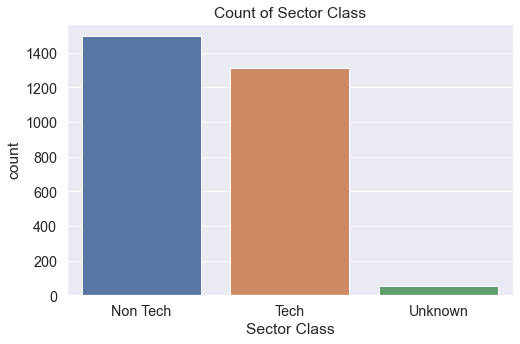

In [121]:
# plot a bar represeting the count of the sector class
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_set, x='Tech or Non-Tech')
plt.title('Count of Sector Class')
plt.xlabel('Sector Class')
plt.show();

>- Through the period from 2018 to 2021 more than 1150 Tech companies were funded. 
>- There are about 994 non tech companies that were funded too. The rest of companies had unknown sector class.

### 2. What was the trend of funding over the years. How many companies were funded each year?

In [122]:
# count the number of startup in each Funding Year
combined_set['Funding Year'].value_counts()

2021    1190
2020    1052
2018     525
2019      89
Name: Funding Year, dtype: int64

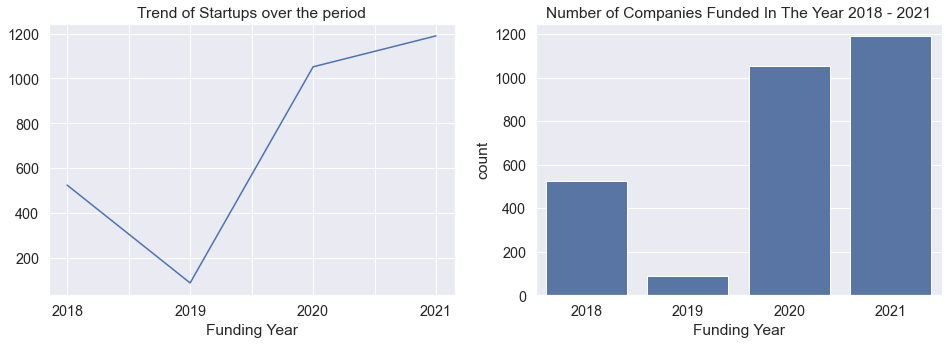

In [123]:
# plot a line gragh to show the trend of startup with the period 2018 - 2021
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = combined_set.groupby(['Funding Year'])['Company Name'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='Funding Year',  
    data=combined_set, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

>- The trend in the indian startup ecosysten has been increasing yearly except that the number of startups dropped in the year 2019, from more than 500 startups in 2018 to less than 100 startups in 2019. We can expect an increase in the number startup in the year after 2021.

### 3. What are the Top Ten Cities with Most Startups?

In [124]:
# count the number of startups in each city
top_ten_HQ = combined_set['Headquarters'].value_counts().head(10).sort_values()
top_ten_HQ

Hyderabad     76
Gurgaon       80
Noida         86
Delhi         88
Pune         104
Chennai      106
New Delhi    230
Gurugram     238
Mumbai       468
Bangalore    859
Name: Headquarters, dtype: int64

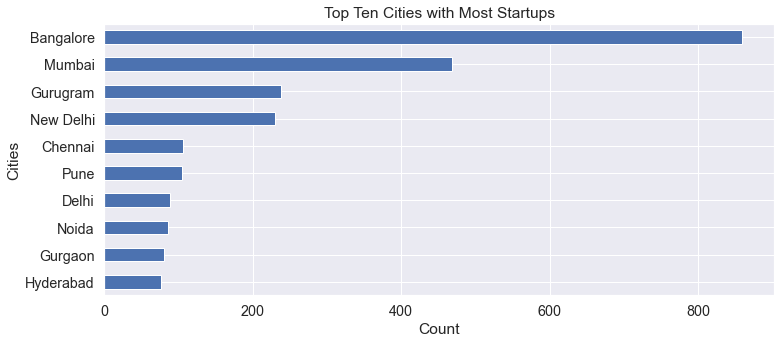

In [125]:
# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_HQ.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

>- Cities that headquartered most startups within the period 2018 to 2021 were in the order Bangalore, Mumbai, Gurugram, New Delhi,, Chennai, Pune, Delhi, Noida, Gurgaon, Hyderabad with 859, 468, 238, 230, 106, 104, 88, 86, 80, 76 startups respevtively.
>- Bangalore has almost twice the number of startups in India's largest city Mumbai. There is a higher chance to be funded as a startup if you have your headquarters in any of these cities.

### 4. Did companies receive multiple fundings through out the time period?

In [126]:
# Check for dupliactes to confirm multiple fundings
duplicate_companies =combined_set.duplicated('Company Name').sum()
duplicate_companies
print(f"There  were {duplicate_companies} duplicates in the combined dataset")

There  were 642 duplicates in the combined dataset


In [127]:
pd.set_option('display.min_rows', None)
number_of_fundings = combined_set.groupby(['Company Name']).agg({'Amount': 'sum', 'Company Name':'count'})
number_of_fundings.rename(columns={'Company Name': 'Number of Fundings'}, inplace=True)
number_of_fundings['Number of Fundings'] = number_of_fundings['Number of Fundings'].astype(str)
number_of_fundings.reset_index(drop=False).sort_values(by='Number of Fundings', ascending=False).head()


,Company Name,Amount,Number of Fundings
2153,Zomato,1239000000.0,7
1309,Nykaa,63135000.0,6
1741,Spinny,525700000.0,6
1908,Trell,163250000.0,6
2141,Zetwerk,925200000.0,6


In [128]:
# get the fraction of the number of company that received funding once, twice and three times or more
total = len(number_of_fundings)
number_of_fundings['Number of Fundings'] = number_of_fundings['Number of Fundings'].astype(int)
one_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] == 1]) / total
two_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] == 2]) / total
multiple_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] >= 3]) / total
print(one_funding +two_funding+ multiple_funding)

1.0


Text(0, 0.5, 'Fraction ')

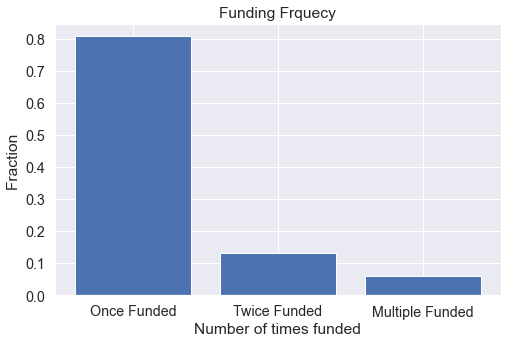

In [129]:
# plot a bar chart to show the fractions or percentages for fundings
plt.figure(figsize=(8, 5))
locations = [1, 2, 3]
heights = [one_funding, two_funding, multiple_funding]
labels = ['Once Funded', 'Twice Funded', 'Multiple Funded']
plt.bar(locations, heights, tick_label=labels)
plt.title('Funding Frquecy')
plt.xlabel('Number of times funded')
plt.ylabel('Fraction ')

>- Over the period of four years only 6% of the total number of funded startups were funded more than twice. Around 13 percent of the total number of startup were funded twice, the rest were all funded once. There isn't high possibility of being funded more than twice within even a longer time period.

### 5. Which sector had most startups?

In [130]:
# check the top 10 cities with the most startups
Top_ten_sectors = combined_set['New Sector'].value_counts().head(10)
Top_ten_sectors

Fintech                    276
Edtech                     261
Healthcare And Wellness    169
Financial Services         168
E-Commerce                 128
Food And Nutrition         103
IT                          81
Automotive                  80
Artificial Inteligence      76
Technology                  67
Name: New Sector, dtype: int64

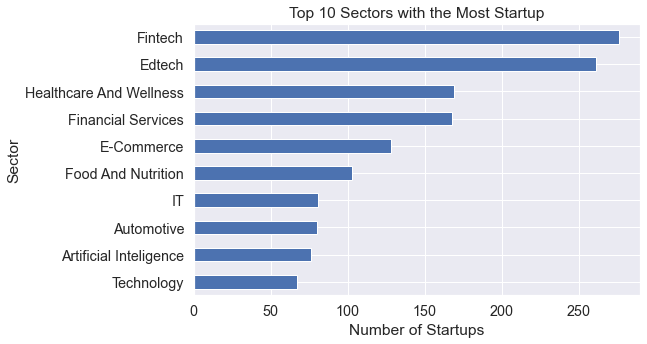

In [131]:
# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

>- The top 10 sectors with the most startups were in the order of- from first to tenth: Fintech, Edtech, Healthcare and wellness , Financial services, E-commerce, Food and nutrition, It, Automotive, Artificial inteligence, Technology with 276, 261, 169, 168, 128, 103, 81, 80, 76 and 67 startups respectively. 
>- Enterpreneurs can to venture into these top 10 sectors to increase their chances of getting funded. Out of these sectors , 7 of them were tech companies

### 6. Which Top 10 Investors funded more (different companies)startups?

In [132]:
Top_10_investors_ = combined_no_duplicates['Investors'].value_counts().head(10)
Top_10_investors_

Inflection Point Ventures    28
Venture Catalysts            25
Mumbai Angels Network        16
Angel investors              14
Titan Capital                11
Unicorn India Ventures       10
Undisclosed                  10
Better Capital                7
Sequoia Capital India         7
Kalaari Capital               6
Name: Investors, dtype: int64

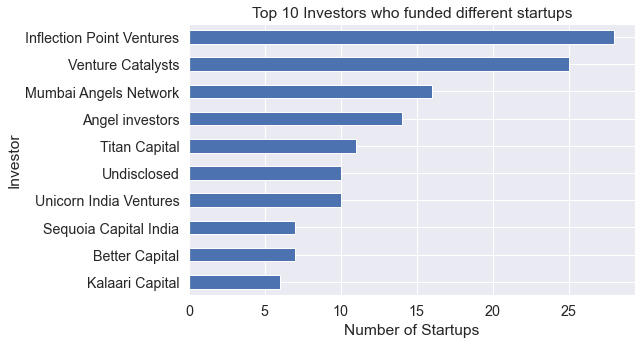

In [133]:
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh')
plt.title('Top 10 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

>- Together these Investors Funded more than 120 startups. Inflection Point Ventures and Venture Catalysts funded 28 and 25 different compabies respectively. We can later find out which sectors or sector class these investors were involed in most.

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 7. What is the highest average funding yearly?

In [134]:
# get the average(mean) funding yearly
average_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)
average_funding_year

,Funding Year,Amount
0,2018,12932425.1
1,2019,43330301.3
2,2020,112950185.8
3,2021,171218804.6


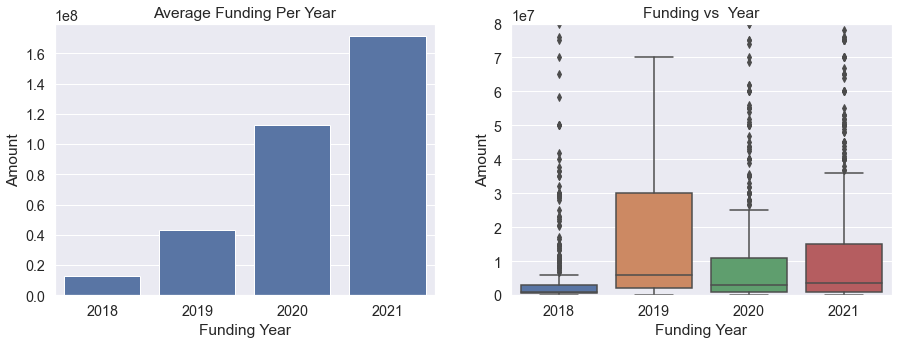

In [135]:
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_set, y='Amount', x='Funding Year')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

>- Looking at the the bar chart graph, the average funding by mean has been increasing yearly. From around 13M dollars in 2018 to 43M dollars in 2019 to 113M dollars in 2020 and to 171 M dollars in 2021.
>- From at the boxplot the year 2019 has the highest average by median compared to the other years. This was due to 2019 having a very small number of startups recorded. Most of the amount in 2018, 2020 and 2021 were treated as outliers. Considering the current trend we can anticipate/assume the median funding in the subsequent years will increase or be high.

### 8. What is the sum of investments yearly?

In [136]:
# get the sum of fundings per year
sum_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'sum'})
sum_funding_year.reset_index(inplace=True)
sum_funding_year

,Funding Year,Amount
0,2018,6789523177.0
1,2019,3336433200.0
2,2020,90924899604.0
3,2021,179608526000.0


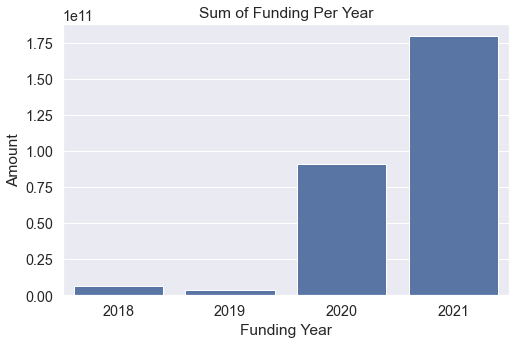

In [137]:
# plot a bar chart to show te sum of funings in ech year
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sum_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)

plt.title('Sum of Funding Per Year')
plt.show()

>- Clearly the year with highest number of startups had the highest sum.

### 9. What is the sum of fundings in by sector class(Tech, Non Tech, Unkown)?

In [138]:
# group the dataframe by sector class and get the sum
sum_sector_class = combined_set.groupby(['Tech or Non-Tech'])['Amount'].sum()
sum_sector_class

Tech or Non-Tech
Non Tech   104020172059.0
Tech       176323566002.0
Unknown       315643920.0
Name: Amount, dtype: float64

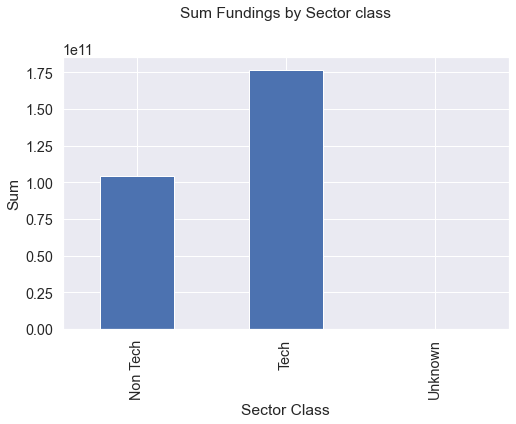

In [139]:
# plot a bar chart to show the sum of the fundings in each sector class
plt.figure(figsize=(8, 5))
sum_sector_class.plot(kind='bar')
plt.title('Sum Fundings by Sector class', pad=40)
plt.ylabel('Sum')
plt.xlabel('Sector Class')
plt.show()

>The total amount of funds received by Tech companies was more than Non Tech companies. It was around 181B dollars for Tech against the 99B dollars for Non Tech. The amount for "Unknown" isn't visisble because compared to the rest it was very small.

### 10. Among the highly funded compnaies which of them were were Tech companies?

In [140]:
# get the median amountin the dataframe 
median = combined_set['Amount'].median()
# create filter of the companies that received funding greater than the median value
highly_funded = combined_no_duplicates.query('Amount > {}'.format(median))
# count the nnumber of companies in the sector class
highly_funded_companies = highly_funded['Tech or Non-Tech'].value_counts()
highly_funded_companies

Non Tech    423
Tech        364
Unknown      12
Name: Tech or Non-Tech, dtype: int64

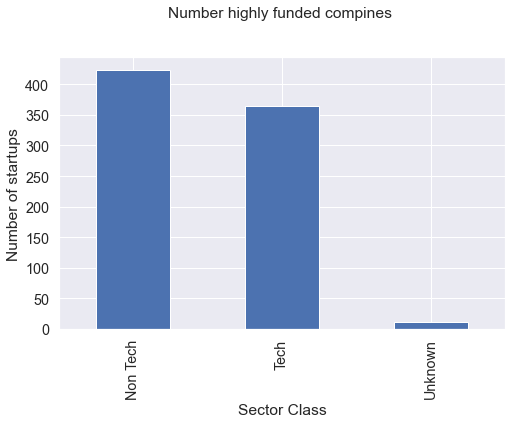

In [141]:
# plot a bar chart to show the number of highly funded companies in each sector class
plt.figure(figsize=(8, 5))
highly_funded_companies.plot(kind='bar')
plt.title('Number highly funded compines ', pad=40)
plt.ylabel('Number of startups')
plt.xlabel('Sector Class')
plt.show()

>.From the chart, the Tech sector class had the highest number highly funded startups. It had 440 startups compared to Non Tech's 347

### 11. Which top 10 Funding Stages received most fundings? How much of it was used to fund a Tech companies?

In [142]:
# # get the top 10 funding stages by  amount
top_10_funded_stages = combined_set.groupby(['Funding Stage']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)
top_10_funded_stages = top_10_funded_stages.reset_index(drop=False)
# get the list Funding stages
list_stages = top_10_funded_stages['Funding Stage'].unique().tolist()
# filter out dataframe that contains the list of funding stages
stages = combined_set[combined_set['Funding Stage'].isin(list_stages)]
stages.head()

,Company Name,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors,New Sector,Tech or Non-Tech,Company Age,Age at Funding
2,MyLoanCare,Series A,Gurgaon,949000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
20,Cogoport,Series A,Mumbai,6000000.0,2018,Disclosed,<NA>,NaN,NaN,Artificial Inteligence,Tech,<NA>,<NA>
25,AgNext Technologies,Series A,Mohali,1000000.0,2018,Disclosed,<NA>,NaN,NaN,Agriculture,Non Tech,<NA>,<NA>
35,Loadshare,Series A,Bengaluru,5000000.0,2018,Disclosed,<NA>,NaN,NaN,Automation Tech,Tech,<NA>,<NA>
36,Yumlane,Series A,Mumbai,4000000.0,2018,Disclosed,<NA>,NaN,NaN,Food And Nutrition,Non Tech,<NA>,<NA>


In [143]:
# group the stages df by 'Funding Stage', 'Tech or Non-Tech' and the total fundings
stages = stages.groupby(['Funding Stage', 'Tech or Non-Tech']).agg({'Amount': 'sum'})
stages_ = stages.reset_index(drop=False) # reset the index
# create three dataframes from the top 10 stages using the values in the 'Tech or Non Tech' column
stages_tech = stages_[stages_['Tech or Non-Tech'] == 'Tech']
stages_nontech = stages_[stages_['Tech or Non-Tech'] == 'Non Tech']
stages_unknown = stages_[stages_['Tech or Non-Tech'] == 'Unknown']

In [144]:
# merge the three dataframes created on the 'Funding Stages' column using 'outer'
stacked_stages_df = pd.merge(stages_tech, stages_nontech, how='outer', on='Funding Stage')
stacked_stages_df_ = pd.merge(stacked_stages_df, stages_unknown, how='outer', on='Funding Stage')
stacked_stages_df_.rename(columns={'Amount_x': 'Tech', 'Amount_y': 'Non Tech', 'Amount': 'Unknown'}, inplace=True)
stacked_stages_df_.drop(columns=['Tech or Non-Tech_x', 'Tech or Non-Tech_y', 'Tech or Non-Tech'], inplace=True)
stacked_stages_df_.set_index('Funding Stage', inplace=True)

In [145]:
stacked_stages_df_.loc[:, 'Sum'] = stacked_stages_df_.loc[:, ['Tech', 'Non Tech', 'Unknown']].sum(axis=1,min_count=1)
stacked_stages_df_.sort_values(by='Sum', inplace=True)
stacked_stages_df_.drop(columns=['Sum'], inplace=True)
# display the result of the merged dfs
stacked_stages_df_

,Tech,Non Tech,Unknown
Funding Stage,,,
Series F,1144800000.0,570400000.0,NaN
Private equity,832000000.0,1324000000.0,NaN
Series H,NaN,2312500000.0,NaN
Series A,1388509276.0,1483138920.0,14589600.0
Series E,1716953000.0,1740524000.0,NaN
Series B,1969198200.0,1833133400.0,40000000.0
Series D,1938467000.0,2454502160.0,7000000.0
Series C,2539624000.0,2813292700.0,75000000.0
Unknown,12892799650.0,86686611674.0,130409000.0


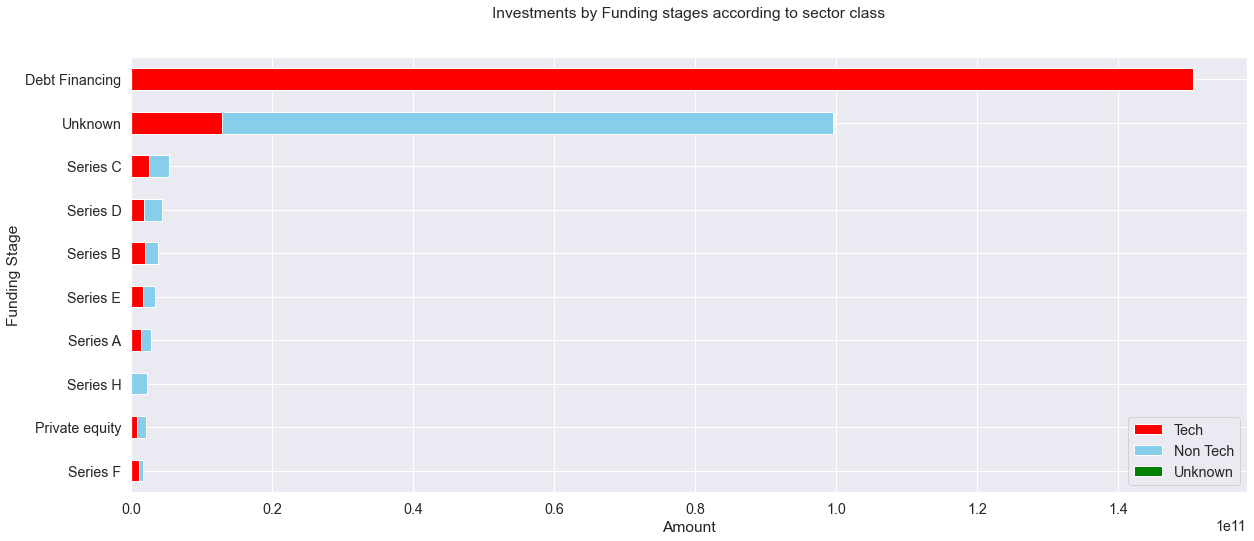

In [146]:
# Used a stacked barplot to visualize the data
stacked_stages_df_.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green'], figsize=(20, 8))
plt.title('Investments by Funding stages according to sector class', pad=40)
plt.ylabel('Funding Stage')
plt.xlabel('Amount')
# plt.xlim(0, 0.41e11)
plt.show()

>- From the graph, 9 of the Funding stages had some of their fundings used to fund Tech companies. All the amount in the Debt Financing was used to fund Tech companies. This shows that investor were comfortable paying for debt for Tech companies. Series A, B, C and D, F had all had slightly above 50% of their amount used to fund Tech companies spliy for Tech and Non Tech companies.

### 12. Which top 10 Cities received most fundings?How much was used to fund Tech companies?

In [147]:
 # get the top 10 Headquaters by  amount
top_10_funded_cities = combined_set.groupby(['Headquarters']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)
top_10_funded_cities = top_10_funded_cities.reset_index(drop=False)
# get the list Headquaters
list_cities = top_10_funded_cities['Headquarters'].unique().tolist()
# filter out dataframe that contains the list of Headquaters
cities = combined_set[combined_set['Headquarters'].isin(list_cities)]
cities.head()

,Company Name,Funding Stage,Headquarters,Amount,Funding Year,Funding Status,Year Founded,Founders,Investors,New Sector,Tech or Non-Tech,Company Age,Age at Funding
0,TheCollegeFever,Seed,Bangalore,250000.0,2018,Disclosed,<NA>,NaN,NaN,Brand Marketing,Non Tech,<NA>,<NA>
1,Happy Cow Dairy,Seed,Mumbai,584000.0,2018,Disclosed,<NA>,NaN,NaN,Agriculture,Non Tech,<NA>,<NA>
2,MyLoanCare,Series A,Gurgaon,949000.0,2018,Disclosed,<NA>,NaN,NaN,Financial Services,Non Tech,<NA>,<NA>
8,Freightwalla,Seed,Mumbai,1000000.0,2018,Disclosed,<NA>,NaN,NaN,IT,Non Tech,<NA>,<NA>
9,Microchip Payments,Seed,Bangalore,1000000.0,2018,Disclosed,<NA>,NaN,NaN,Fintech,Tech,<NA>,<NA>


In [148]:
# group the cities df by 'Headquarters', 'Tech or Non-Tech' and the total fundings
cities = cities.groupby(['Headquarters', 'Tech or Non-Tech']).agg({'Amount': 'sum'})
cities_ = cities.reset_index(drop=False)  # reset the index
# create three dataframes from the top 10 cities using the values in the 'Tech or Non Tech' column
cities_tech = cities_[cities_['Tech or Non-Tech'] == 'Tech']
cities_nontech = cities_[cities_['Tech or Non-Tech'] == 'Non Tech']
cities_unknown = cities_[cities_['Tech or Non-Tech'] == 'Unknown']

In [149]:
# merge the three dataframes created on the 'Headquarters' column using 'outer' as how
stacked_cities_df = pd.merge(cities_tech, cities_nontech, how='outer', on='Headquarters')
stacked_cities_df_ = pd.merge(stacked_cities_df, cities_unknown, how='outer', on='Headquarters')
stacked_cities_df_.rename(columns={'Amount_x': 'Tech', 'Amount_y': 'Non Tech', 'Amount': 'Unknown'}, inplace=True)
stacked_cities_df_.drop(columns=['Tech or Non-Tech_x', 'Tech or Non-Tech_y', 'Tech or Non-Tech'], inplace=True)

In [150]:
stacked_cities_df_.set_index('Headquarters', inplace=True)


In [151]:
stacked_cities_df_.loc[:, 'Sum'] = stacked_cities_df_.loc[:, ['Tech', 'Non Tech', 'Unknown']].sum(axis=1,min_count=1)
stacked_cities_df_.sort_values(by='Sum', inplace=True)
stacked_cities_df_.drop(columns=['Sum'], inplace=True)
#  display the results of the merged dfs
stacked_cities_df_

,Tech,Non Tech,Unknown
Headquarters,,,
Delhi,364285900.0,474138700.0,2500000.0
Haryana,383675200.0,539309800.0,NaN
Chennai,748452300.0,380523526.0,1000000.0
Gurgaon,216134920.0,1169291260.0,14330000.0
Pune,526574000.0,861361785.0,14002920.0
California,3078300000.0,NaN,NaN
New Delhi,1581557500.0,1855713540.0,250000.0
Gurugram,2031230500.0,3533782000.0,11219000.0
Bangalore,9853902376.0,13968690228.0,50281800.0


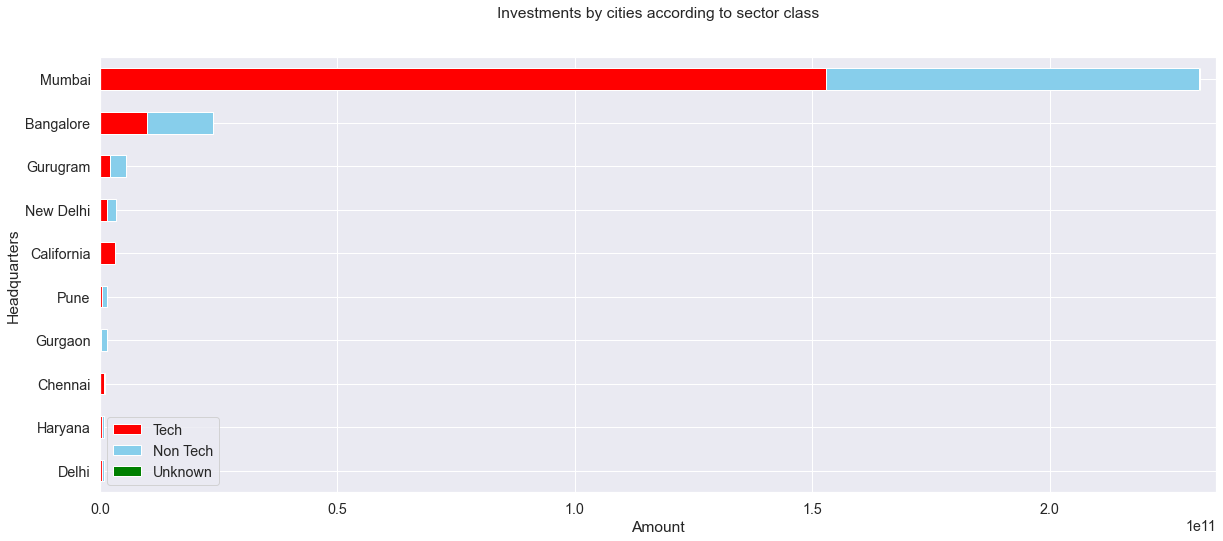

In [152]:
# Used a stacked barplot to visualize the data
stacked_cities_df_.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green'], figsize=(20, 8))
plt.title('Investments by cities according to sector class', pad=40)
plt.ylabel('Headquarters')
plt.xlabel('Amount')
plt.xlim(0, 2.35e11)
plt.show()

>- From the graph, Mumbai startups had a more than 230billion dollars in fundings. Out of the Fundings almost two-thirds of it was used to fund Tech companies. Tech companies that heardquarted in carlifonia had all of their fundings used to invest in Tech companies. Bangalore, Chennai, Delhi, New Delhi and Prune had more of their fundings used to invest in Tech comapnies.

### Recommendations

1. Entrepreneurs who are considering starting a company should consider venturing into Tech. Most the companies that were funded were Tech companies and also they were the same ones that received higher investments.
>
2. Enterpreneurs should consider headquartering their companies in Mumbai, Bangalore and Gurugram. These cities are in the top three cities by both number of startups and by the sum of fundings generated.
>
3. During the Pre seed and Seed stage of the startup journey, entrepreneurs should seek fundings from family and friends since it gives them a certain flexibility. Loans from families and friends may be without security or less security than banks. Families and friends may also lend funds interest-free or at a low rate. A company received funding as low as 876 dollars. This money might come with no interest if given out by a family or friend.
>.
4. Entrepreneurs venturing into startups can consider the following sectors Fintech, Edtech, Healthcare and wellness , Financial services, E-commerce. Entrepreneurs who venture into these sectors might increase their chances of getting funded-not necessarily a huge amount.The datasets and the complete code can be found on my github. There might be more visualizations and questions in there than in this article since i will still be working on the project.